Аналіз датасетів вин (лінійні регресії)

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/ML_Hillel/HW_L5_LinearRegr_Regularization/wine+quality/"

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Зчитуємо перший датасет (червоні вина):
df_redw = pd.read_csv(path + 'winequality-red.csv', delimiter=';')
df_redw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
#Загальна інформація
df_redw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Бачимо, що всі значення числові, і пропущених немає

In [62]:
# Зчитуємо другий датасет (білі вина):
df_whitew = pd.read_csv(path + 'winequality-white.csv', delimiter=';')
df_whitew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
#Загальна інформація
df_whitew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Висновок по загальній інформації: обидва датасети без пропусків та мають однакову структуру. Крім цього, всі колонки числові, що робить можливість зручного аналізу.

Цільовою колонкою (таргетом) є quality

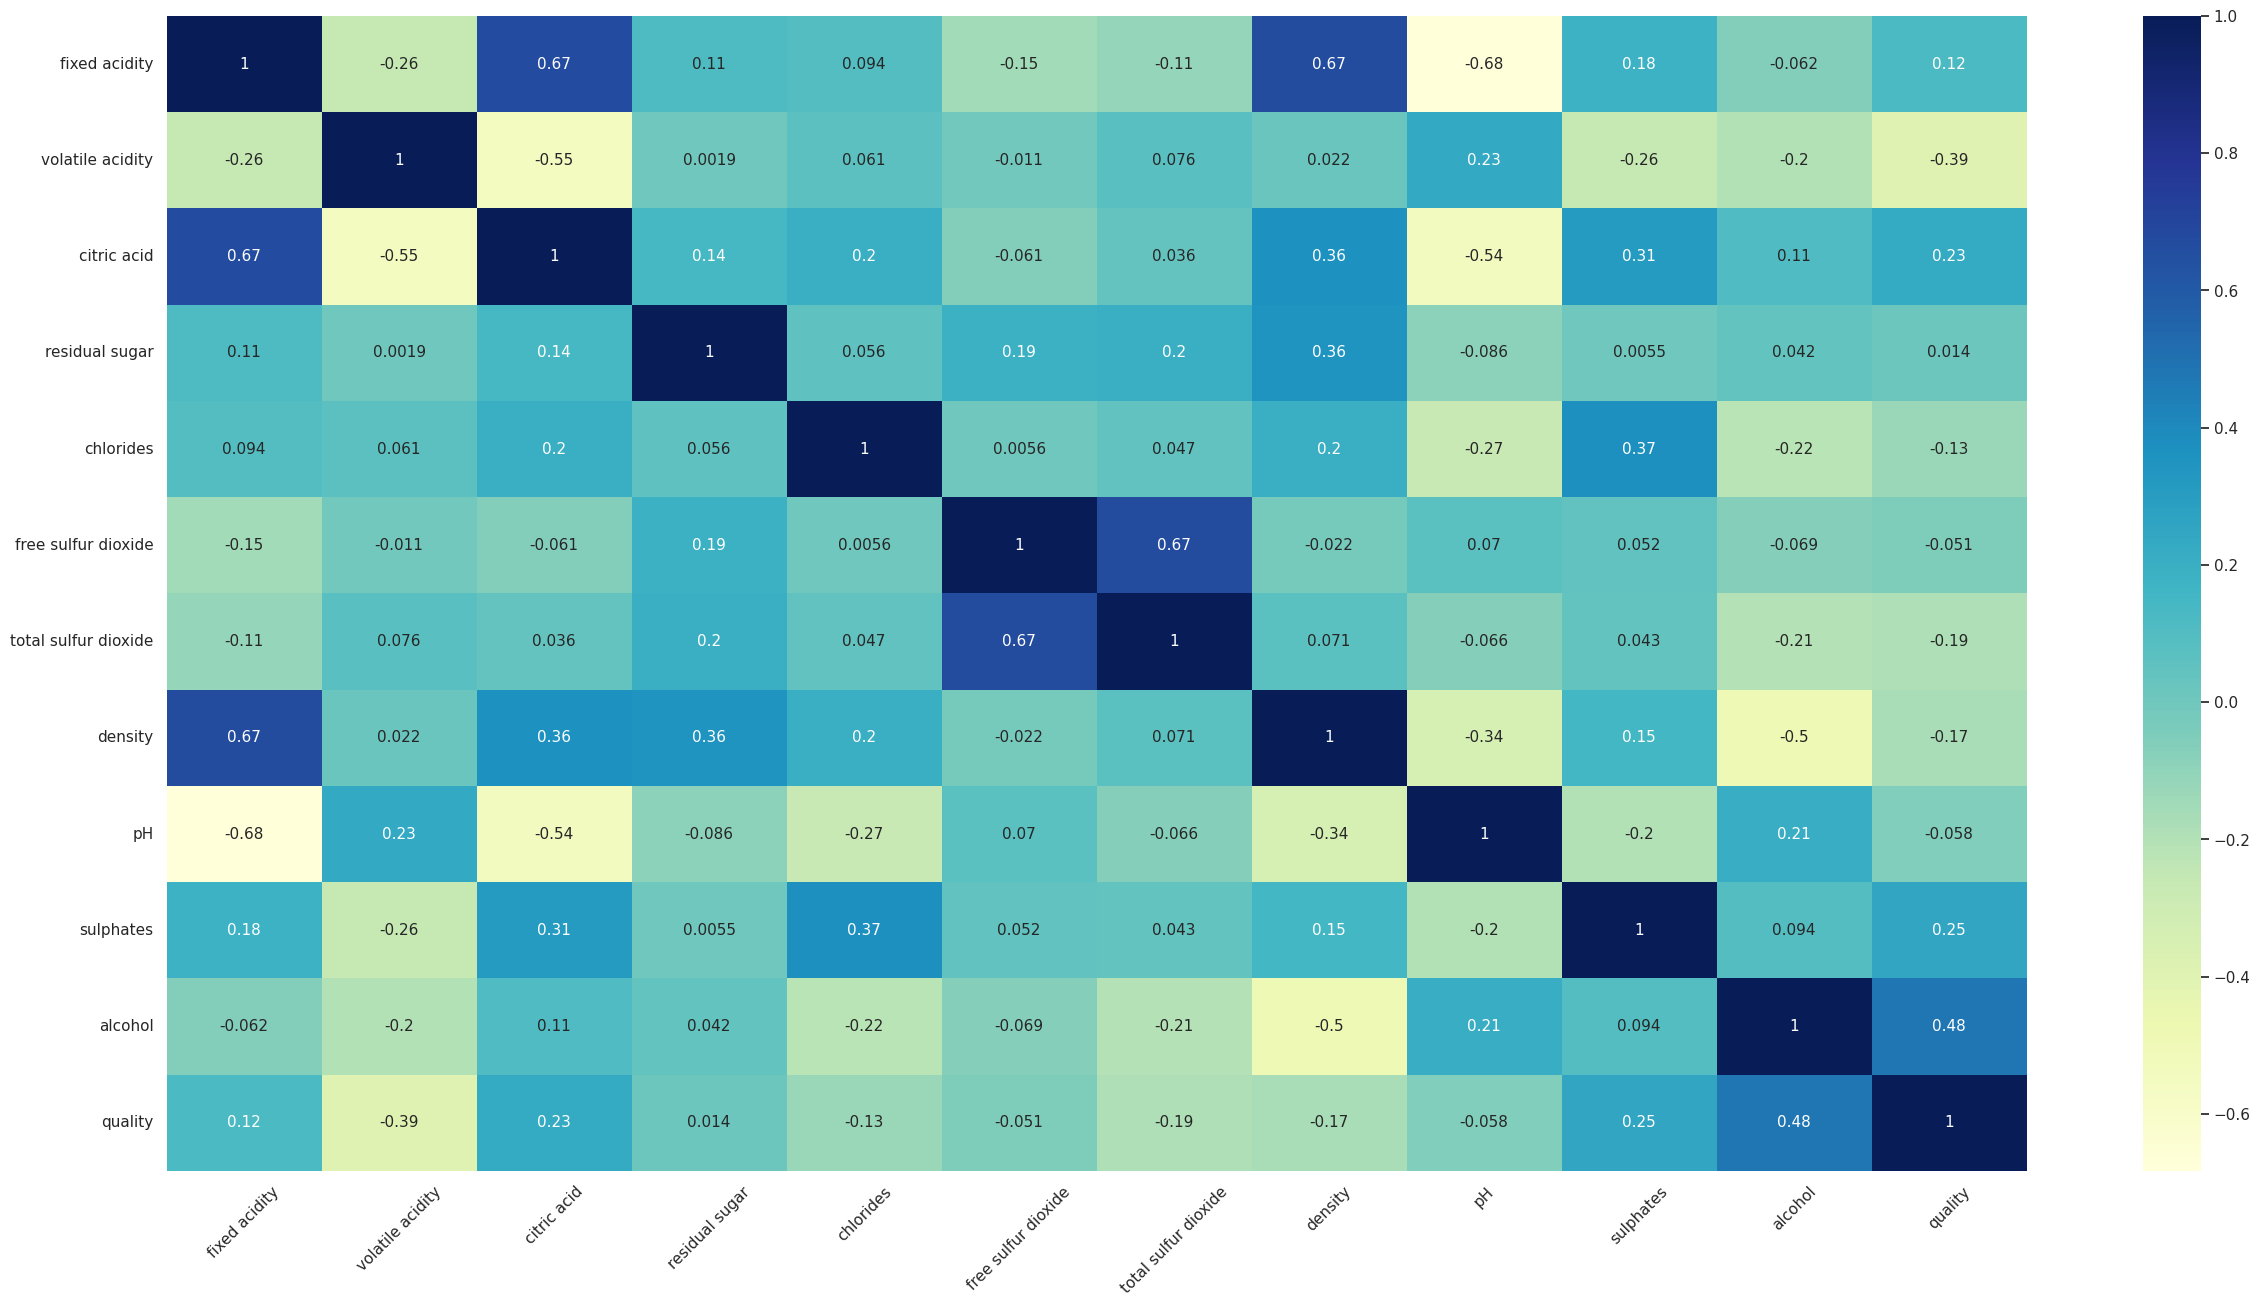

In [64]:
# Побудуємо матрицю кореляцій для першого (red wines) датасету за допомогою heatmap:
corr_matrix_r = df_redw.corr()

plt.figure(figsize=(30, 15))

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix_r, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11})
plt.xticks(rotation=45)
plt.show()


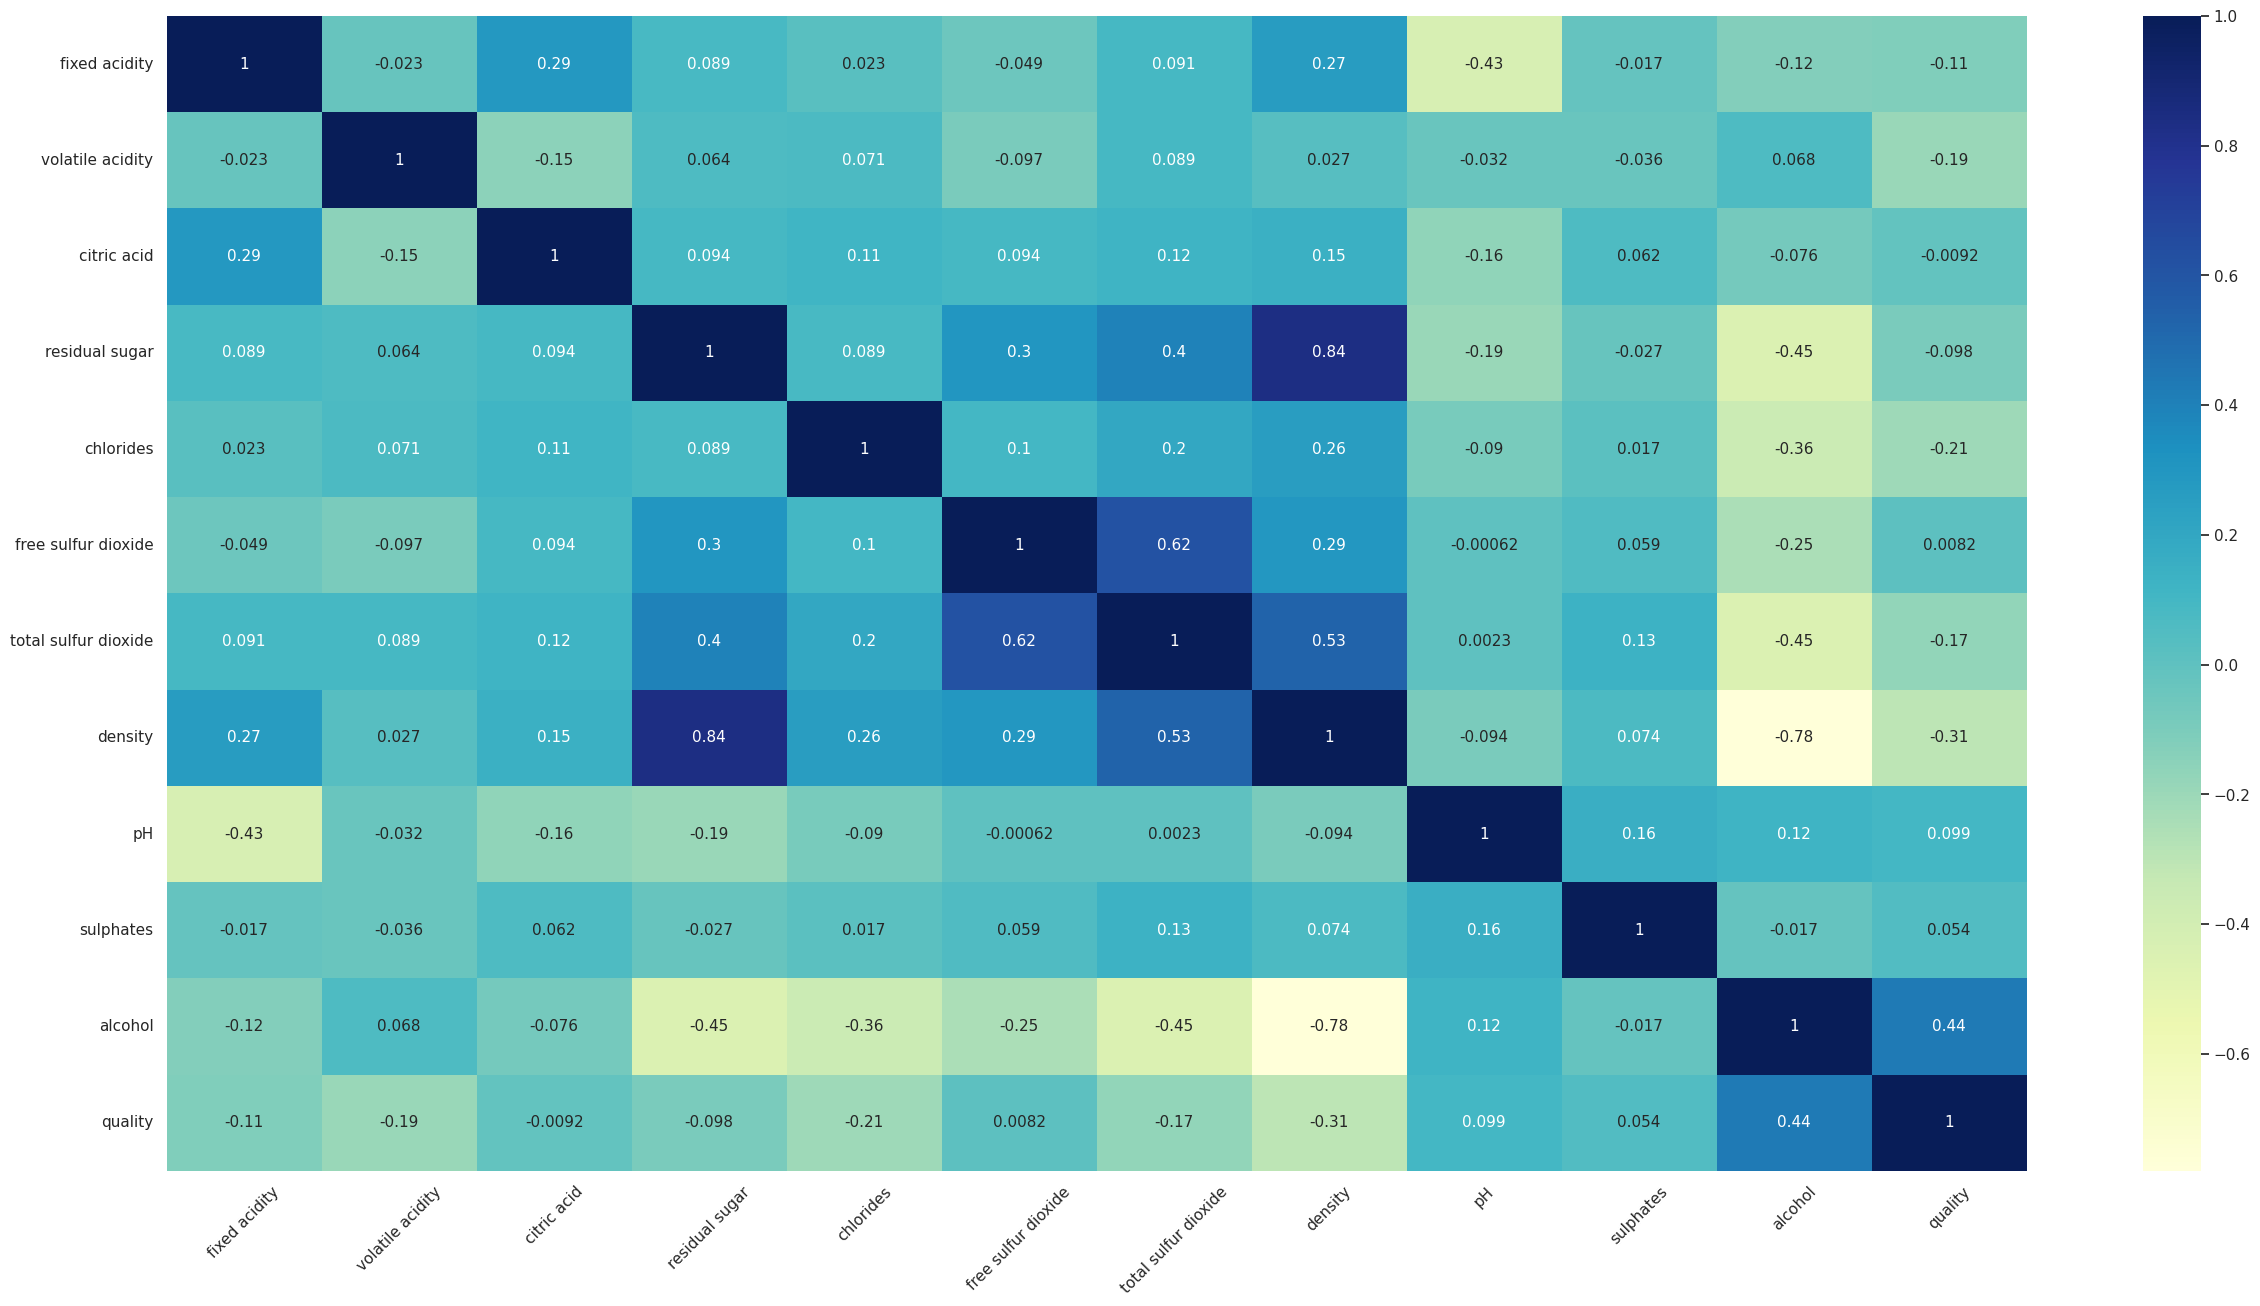

In [65]:
# Побудуємо матрицю кореляцій для другого датасету (white wines) за допомогою heatmap:
corr_matrix_w = df_whitew.corr()

plt.figure(figsize=(30, 15))

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix_w, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11})
plt.xticks(rotation=45)
plt.show()

Згідно аналізу графіків теплової карти:


*   виявлено суттєві відмінності у кореляціях з цільовою змінною таких ознак, як volatile acidity, citric acid, density, sulphates. Очевидно, для білого та червоного вин дані характеристики впливають по різному на якість вина
*   виявлено аномально велику кореляцію між  residual sugar (залишковий цукор) і density (щільність) саме для білого вина.



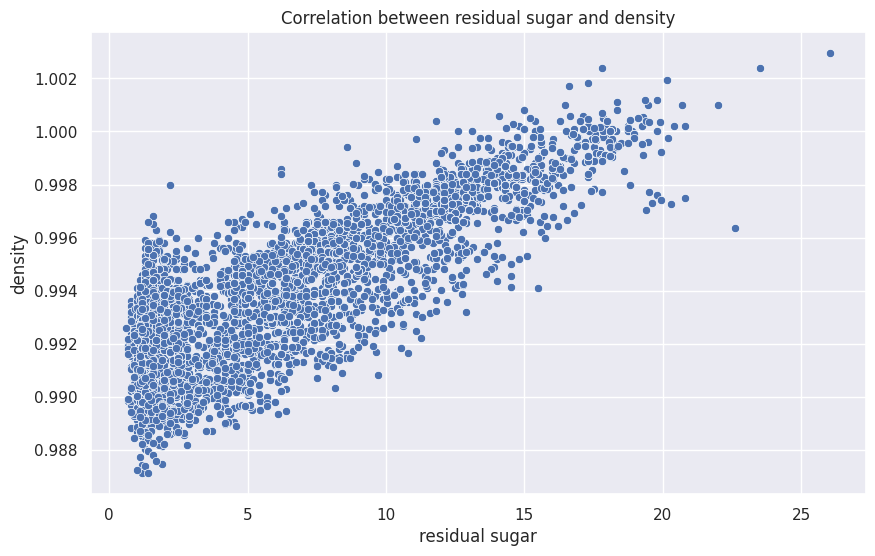

In [66]:
#Проілюструємо кореляцію між residual sugar (залишковий цукор) і density (щільність) для датасету white wine
# (для наглядності відкинуто два найбільш екстремальні outlayers )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', data=df_whitew[df_whitew['residual sugar'] < 30])
plt.xlabel('residual sugar')
plt.ylabel('density')
plt.title('Correlation between residual sugar and density')
plt.show()

Оскільки бачимо значну кореляцію (сильний взаємозв'язок), тому для датасету white wines доцільно враховувати надалі при побудові моделей тільки одну з цих двох змінних.

In [67]:
df_whitew_model = df_whitew.drop(columns = ['residual sugar'])
df_whitew_model

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


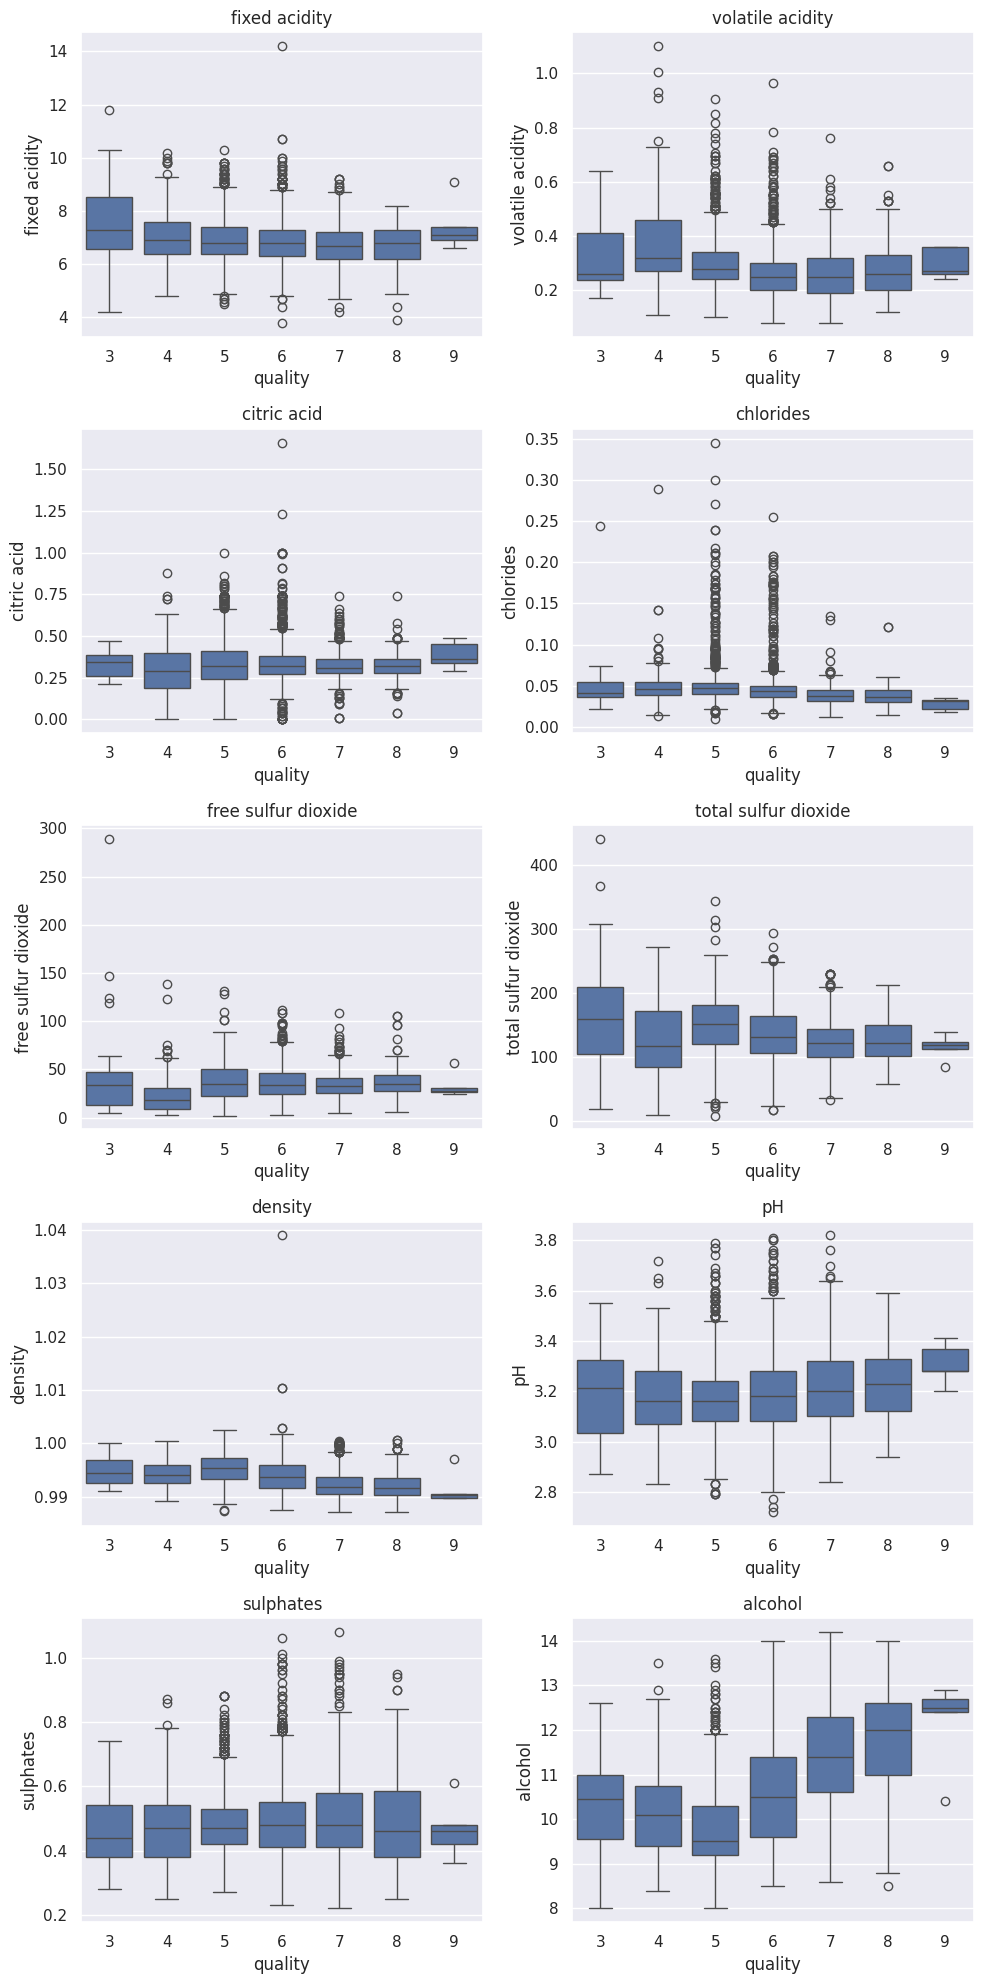

In [68]:
#Побудуємо графіки взаємозв'язку між змінними та цільовою функцією

n_features = df_whitew_model.shape[1] - 1
n_rows = (n_features) // 2
n_cols = 2
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))

for i, feature in enumerate(df_whitew_model.columns[:-1]):
    row = i // 2
    col = i % 2
    sns.boxplot(x='quality', y=feature, data=df_whitew_model, ax=axs[row][col])
    axs[row][col].set_title(feature)

plt.tight_layout()

plt.show()

Цікаве спостереження: нелінійна залежність між кількістю алкоголю і якістю, зі збільшенням алкоголю якість або покращується, або погіршується, хоч і з тенденцією до покращення (зразки білих вин з найкращою якістю мають великий відсоток алкоголю)

<Axes: xlabel='quality', ylabel='count'>

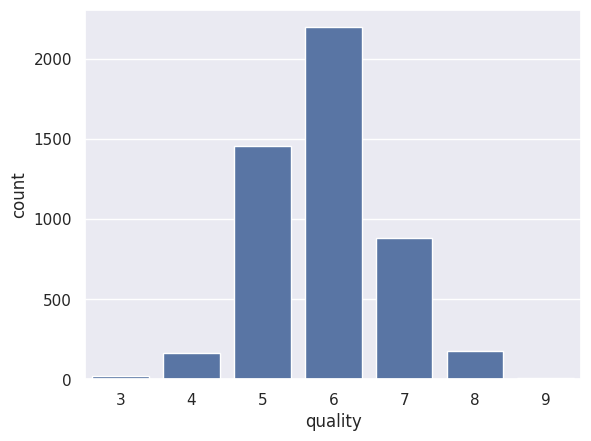

In [69]:
# Виведемо графік розподілу цільової змінної:
sns.countplot(data=df_whitew_model, x='quality')

Бачимо, що цільова змінна незбалансована, відповідно, при розбитті на тренувальну та тестову вибірки важливо зберегти розподіл цільової змінної.

In [70]:
# Формуємо дані для X та y (незалежні та залежна змінні)
X = df_whitew_model.drop('quality', axis = 1)
y = df_whitew_model['quality']

In [71]:
# Ділимо вибірку на трейнову та тестову. Оскільки класи незбалансовані, використаємо парамер stratify=y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

In [72]:
#стандартизація значень за диференційованим підходом (навчаємо scaler тільки на тренувальних даних)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Лінійна регресія (white wines)

In [73]:
# Створюємо об'єкт лінійної регресії:
reg = LinearRegression()

# Робимо крос-валідацію с кількістю фолдів = 5:
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5)

# Тренуємо модель на тренувальних даних:
reg.fit(X_train_scaled, y_train)

# Розраховуємо оцінку на треувальній та тестовій вибірці:
train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.24714596 0.21043694 0.27996108 0.25682286 0.30190905]
Train Score: 0.26465994824038364
Test Score: 0.2636898535751093


Оцінка по 5 фолдам вийшла більш-менш однакова, це означає, що модель стабільна.

In [74]:
# Знайдемо метрики моделі MSE та RMSE.

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    return {
        "MSE Train": round(mse_train, 3),
        "MSE Test": round(mse_test, 3),
        "RMSE Train": round(rmse_train, 3),
        "RMSE Test": round(rmse_test, 3)
    }

In [75]:
# Обчислюємо метрики для моделі
evaluate_model(reg, X_train_scaled, X_test_scaled, y_train, y_test)

{'MSE Train': 0.577, 'MSE Test': 0.577, 'RMSE Train': 0.76, 'RMSE Test': 0.759}

Бачимо, що метрики знаходяться на нормальному рівні. При цьому помилки на тестовій вибірці такі ж, як і відповідні помилки на тренувальній вибірці. Це означає, що модель не перенавчилась.

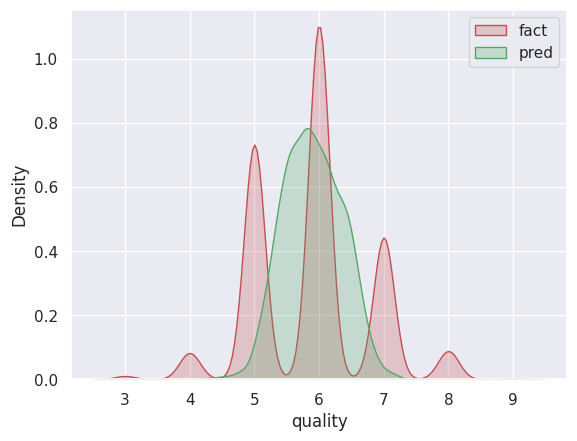

In [76]:
# Цікаво візуалізувати наші результати за допомогою графіка щільності:
sns.kdeplot(df_whitew_model.quality, shade=True, color='r', label='fact')
sns.kdeplot(reg.predict(X_test_scaled), shade=True, color='g', label='pred')
plt.legend()

Як видно з графіку, модель має проблеми у виявленні крайніх класів цільової змінної. Причина цього: невелика кількість даних крайніх класів, відповідно, модель не змогла навчитися на них

На даному етапі доцільно зробити висновок, чи продовжувати аналіз з датасетами окремо, чи з об'єднаним датасетом.
Тому подальший план дій такий:


*   аналіз лінійної регресії з датасетом червоного вина
*   формування об'єднаного датасету
*   аналіз лінійної регресії з об'єднаним датасетом вина
*   вибір датасету (окремо чи об'єднаний) для подальшого аналізу
*   аналіз з підбором гіперпараметрів









## Аналіз лінійної регресії з датасетом червоного вина

<Axes: xlabel='quality', ylabel='count'>

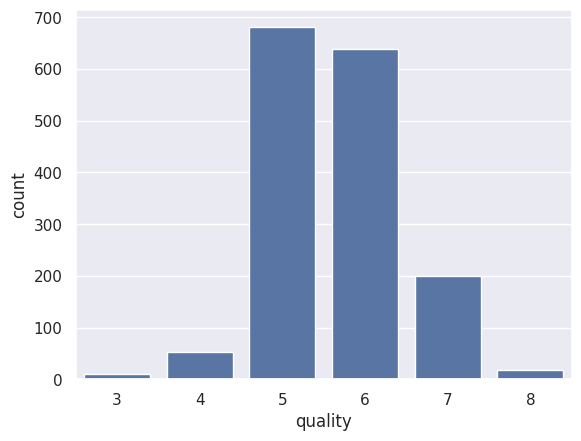

In [77]:
# Виведемо графік розподілу цільової змінної:
sns.countplot(data=df_redw, x='quality')

Бачимо, що цільова змінна незбалансована, відповідно, при розбитті на тренувальну та тестову вибірки важливо зберегти розподіл цільової змінної.

In [78]:
# Формуємо дані для X та y (незалежні та залежна змінні)
X = df_redw.drop('quality', axis = 1)
y = df_redw['quality']

In [79]:
# Ділимо вибірку на трейнову та тестову. Оскільки класи незбалансовані, використаємо парамер stratify=y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

In [80]:
#стандартизація значень за диференційованим підходом (навчаємо scaler тільки на тренувальних даних)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [81]:
# Створюємо об'єкт лінійної регресії:
reg = LinearRegression()

# Робимо крос-валідацію с кількістю фолдів = 5:
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5)

# Тренуємо модель на тренувальних даних:
reg.fit(X_train_scaled, y_train)

# Розраховуємо оцінку на треувальній та тестовій вибірці:
train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.33065964 0.27711887 0.35699677 0.44002985 0.29274129]
Train Score: 0.36526010158110445
Test Score: 0.33844117552384134


In [82]:
# Обчислюємо метрики для моделі
evaluate_model(reg, X_train_scaled, X_test_scaled, y_train, y_test)

{'MSE Train': 0.414,
 'MSE Test': 0.429,
 'RMSE Train': 0.644,
 'RMSE Test': 0.655}

Для датасету red wine вийшли навіть кращі характеристики, ніж для датасету white wine. При цьому помилки на тестовій вибірці лише трішки більші за
відповідні помилки на тренувальній вибірці. Це добре і означає, що модель не перенавчилась.

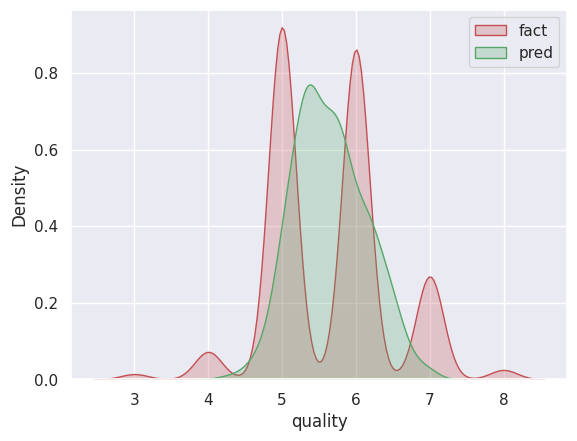

In [83]:
# Цікаво візуалізувати наші результати за допомогою графіка щільності:
sns.kdeplot(df_redw.quality, shade=True, color='r', label='fact')
sns.kdeplot(reg.predict(X_test_scaled), shade=True, color='g', label='pred')
plt.legend()

## Формування об'єднаного датасету

In [84]:
# Створимо нові бінарні фічі для датасетів білого і червоного вина, які в загальному датасеті ідентифікуватимуть тип вина.
# Оскільки інших вин, крім червоного і білого у досліді не розглядається, то назвемо змінну is_white, і вона буде приймати значення 1 для білого
# і значення 0 для червоного вина
df_whitew['is_white'] = 1
df_redw['is_white'] = 0


In [85]:
# Об'єднуємо датасети
df_united = pd.concat([df_whitew, df_redw], ignore_index=True)

In [86]:
df_united

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [87]:
print(df_whitew.shape)
print(df_redw.shape)
print(df_united.shape)

(4898, 13)
(1599, 13)
(6497, 13)


Структура збереглась, об'єднання пройшло успішно

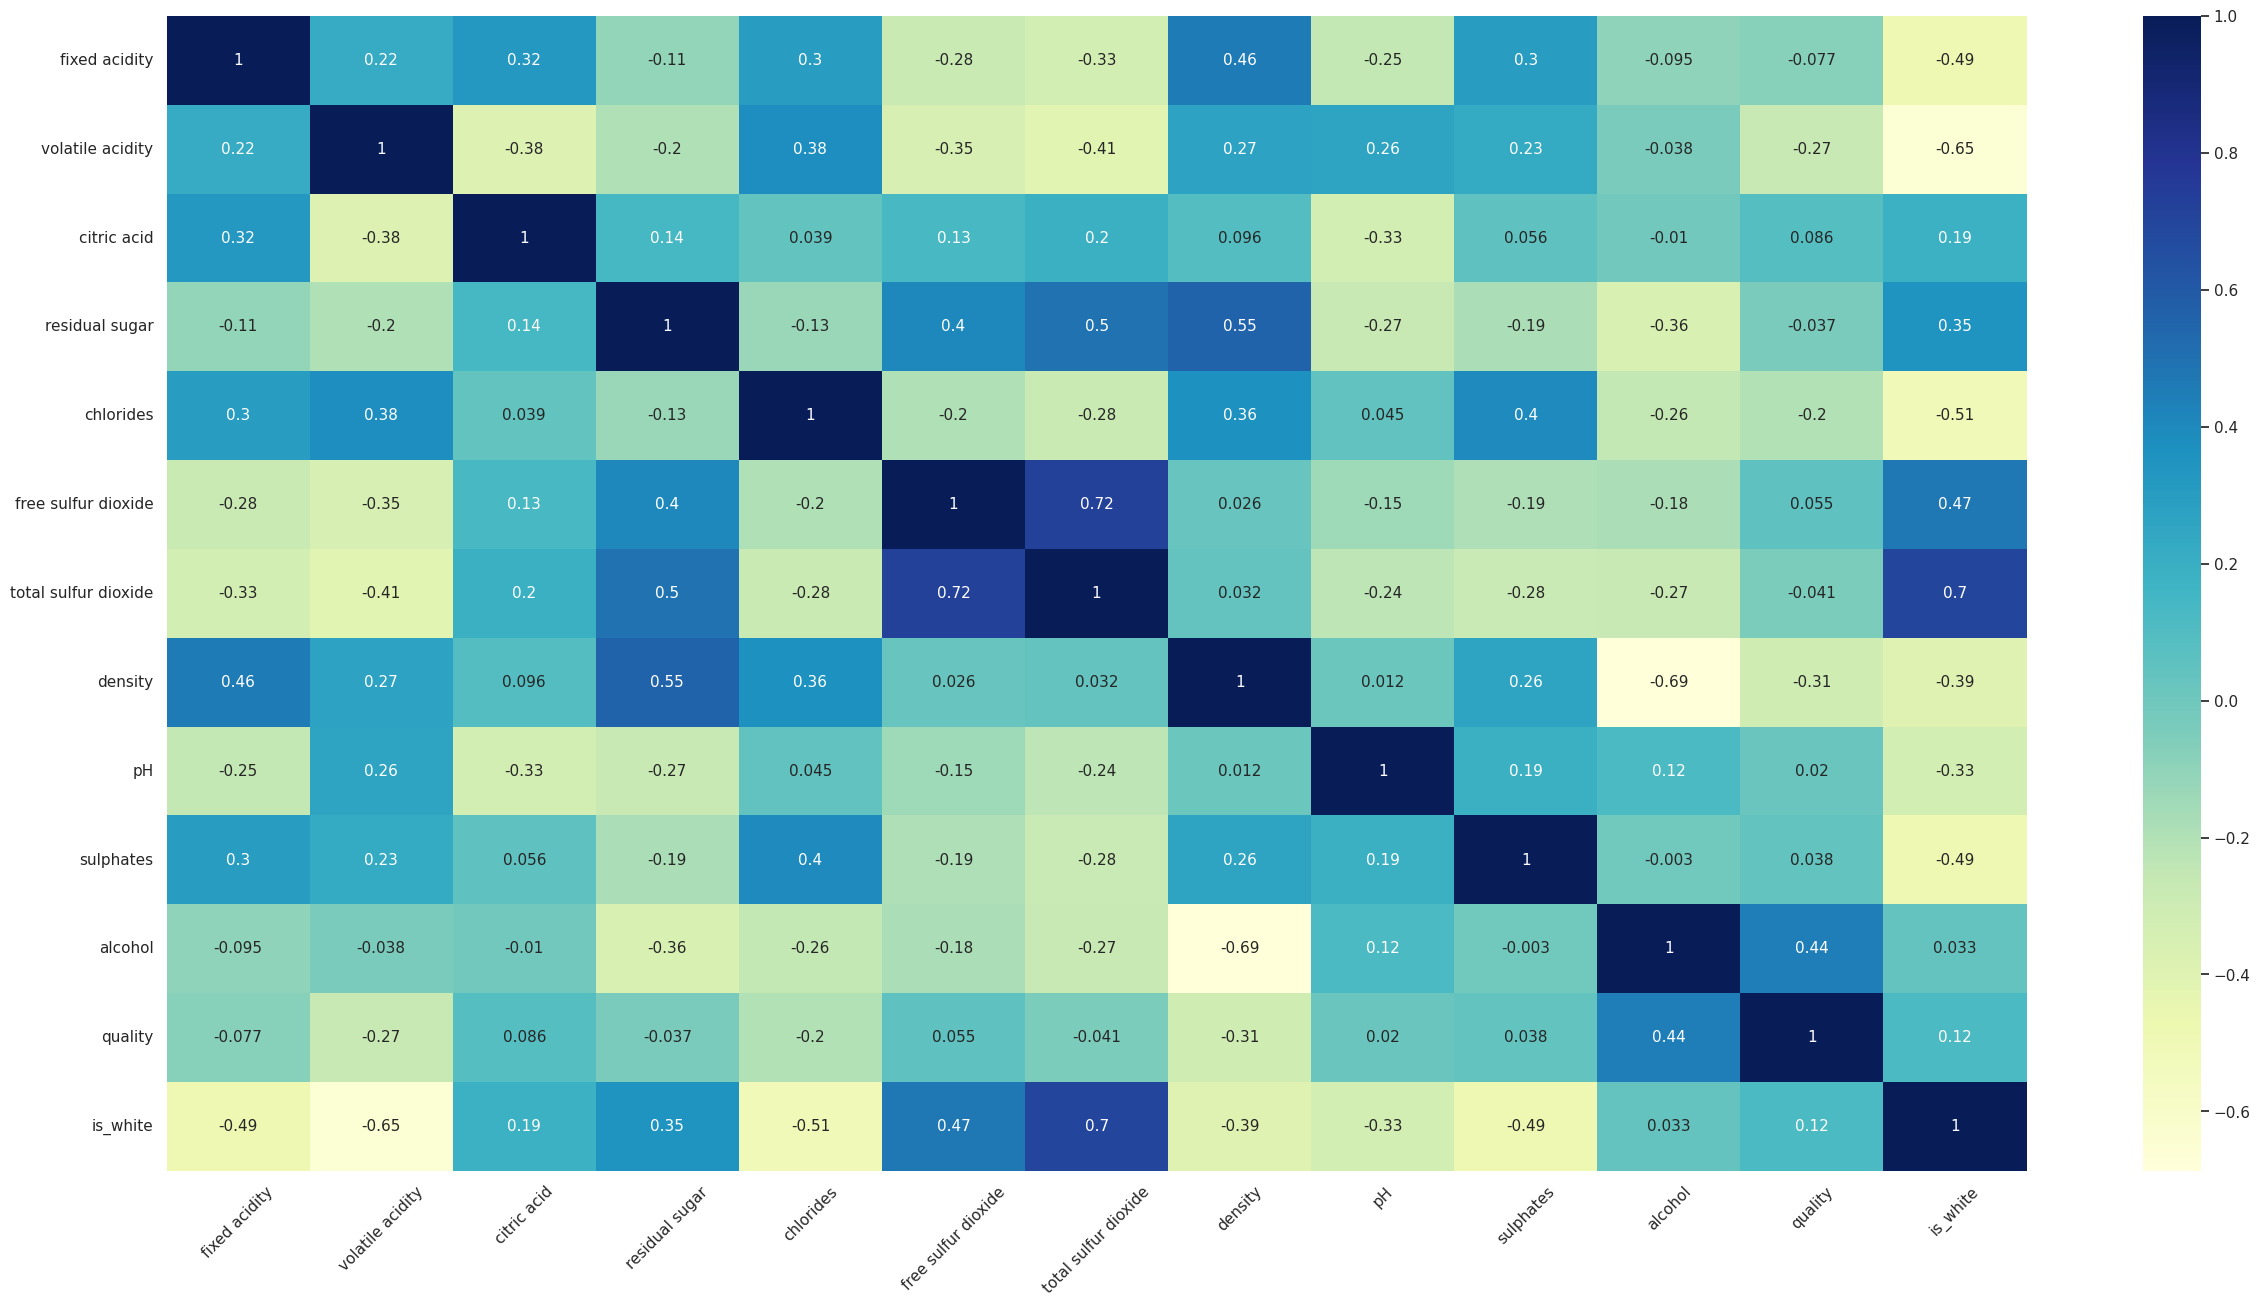

In [88]:
# Побудуємо матрицю кореляцій для об'єднаного датасету  за допомогою heatmap:
corr_matrix_w = df_united.corr()

plt.figure(figsize=(30, 15))

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix_w, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11})
plt.xticks(rotation=45)
plt.show()

Кореляції, більшої за модулем за 0.8, немає, тому переходимо до моделі

In [89]:
# Формуємо дані для X та y (незалежні та залежна змінні)
X = df_united.drop('quality', axis = 1)
y = df_united['quality']

# Ділимо вибірку на трейнову та тестову. Оскільки класи незбалансовані, використаємо парамер stratify=y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

#стандартизація значень за диференційованим підходом (навчаємо scaler тільки на тренувальних даних)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [90]:
# Створюємо об'єкт лінійної регресії:
reg = LinearRegression()

# Робимо крос-валідацію с кількістю фолдів = 5:
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5)

# Тренуємо модель на тренувальних даних:
reg.fit(X_train_scaled, y_train)

# Розраховуємо оцінку на треувальній та тестовій вибірці:
train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.31397989 0.31131767 0.29668496 0.26876175 0.2640512 ]
Train Score: 0.29481400815841674
Test Score: 0.29989198062845157


In [91]:
# Обчислюємо метрики для моделі
evaluate_model(reg, X_train_scaled, X_test_scaled, y_train, y_test)

{'MSE Train': 0.538,
 'MSE Test': 0.534,
 'RMSE Train': 0.733,
 'RMSE Test': 0.731}

Висновок по аналізу моделі: модель об'єднаного датасету не показала явно кращого результату, оцінка моделі на тесті (0,3) є кращою за оцінку моделі білого вина, але гіршою за оцінку моделі червоного вина. Ще звернемо увагу, що значення об’єднаного RMSE знаходиться між значеннями RMSE окремих датасетів, а оцінка на тестовій вибірці навіть краща за оцінку на тренувальній, отже, перенавчання не спостерігається.
Отже, використання спільного датасету не приносить ефективності в результатах оцінок, згідно аналізу графіку heatmap, характеристики вин дещо відрізняються, тому краще розглядати їх окремо.

Аналіз продовжимо на датасеті червоного вина

Оскільки для зручності використовували одні змінні X, y , то ініціалізуємо їх ще раз

In [92]:
# Формуємо дані для X та y (незалежні та залежна змінні)
X = df_redw.drop('quality', axis = 1)
y = df_redw['quality']

# Ділимо вибірку на трейнову та тестову. Оскільки класи незбалансовані, використаємо парамер stratify=y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

#стандартизація значень за диференційованим підходом (навчаємо scaler тільки на тренувальних даних)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [93]:
# Створюємо об'єкт лінійної регресії:
reg = LinearRegression()

# Робимо крос-валідацію с кількістю фолдів = 5:
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5)

# Тренуємо модель на тренувальних даних:
reg.fit(X_train_scaled, y_train)

# Розраховуємо оцінку на тренувальній та тестовій вибірці:
train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

# Обчислюємо метрики для моделі
evaluate_model(reg, X_train_scaled, X_test_scaled, y_train, y_test)

Cross-Validation Scores: [0.33065964 0.27711887 0.35699677 0.44002985 0.29274129]
Train Score: 0.36526010158110445
Test Score: 0.33844117552384134


{'MSE Train': 0.414,
 'MSE Test': 0.429,
 'RMSE Train': 0.644,
 'RMSE Test': 0.655}

Перейдемо до регуляризації моделі

In [94]:
# Використаємо Ridge регуляризацію
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.42934484836537967
MAE: 0.5151918626821088
R2: 0.33842621308158305


Здійснимо підбір гіперпараметрів через GridSearchCV

In [95]:
#GridSearchCV

param_grid = {'alpha': np.linspace(0, 10, 50),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = Ridge(random_state=17)

ridge_grid = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
ridge_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(random_state=17),
             param_grid={'alpha': array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204...45,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [96]:
y_pred = ridge_grid.predict(X_test_scaled)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.4294378327967276
MAE: 0.5153403431689216
R2: 0.3382829341704572


Метрики залишились приблизно на тому ж рівні. Можна зробити висновок, що регуляризація не допомогла, оскільки модель і без неї не була схильна до перенавчання

In [97]:
# Ще спробуємо регуляризувати через ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)

y_pred = elastic_net.predict(X_test_scaled)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.6491183402070533
MAE: 0.6825229357798165
R2: -0.0002208716931364485


Звернемо увагу на те, що дефолтні параметри ElasticNet не дають доброї оцінки моделі. Підберемо кращі параметри за допомогою GridSearchCV

In [98]:
#GridSearchCV

param_grid = {'alpha': np.linspace(0, 10, 50),
              'l1_ratio': np.linspace(0.1, 0.99, 10)}

elastic_net = ElasticNet()

elastic_net_grid = GridSearchCV(estimator=elastic_net,
                                 param_grid=param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
elastic_net_grid.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.3061...
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
                         'l1_ratio': array([0.1       , 0.19888889, 0.29777778, 0.39666667, 0.49555556,
       0.59444444, 0.69333333, 0.79222222, 0.89111111, 0.99      ])},
             scoring='neg_mean_squared_error')

In [99]:
y_pred = elastic_net_grid.predict(X_test_scaled)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.42933513811441515
MAE: 0.5151750426947079
R2: 0.33844117552384134


Як видно, оцінка покращилась , але не є краща за нерегуляризовану модель. Це пояснюється тим, що модель і так не є перенавчена

Поліноміальна регресія

In [102]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

# Навчаємо поліноміальну регресію на отриманому на попередньому кроці масиві X_poly_train
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

evaluate_model(lr_poly, X_poly_train, X_poly_test, y_train, y_test)

{'MSE Train': 0.432,
 'MSE Test': 0.506,
 'RMSE Train': 0.658,
 'RMSE Test': 0.712}

In [103]:
# Розраховуємо оцінку на тренувальній та тестовій вибірці:
train_score = lr_poly.score(X_poly_train, y_train)
test_score = lr_poly.score(X_poly_test, y_test)

# Виводимо на екран оцінку по фолдам а також по тренувальній та тестовій вибіркам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.33065964 0.27711887 0.35699677 0.44002985 0.29274129]
Train Score: 0.33738008539824305
Test Score: 0.21994096676261055


Бачимо, що метрики на test знизились, що є ознакою перенавчання, що є властивим для ступеневої регресії.

## Логістична регресія

In [ ]:
# Оскільки наша цільова змінна є дискретною та ординальною, цілком доречно розглядати побудову моделі як проблему
# класифікації. Тож давайте спробуємо застосувати логістичну регресію і подивимось, що вийде.

In [104]:
# Створимо функцію, яка буде виводити репорти:
def get_report(model, X, y_true):
    y_pred = model.predict(X)
    print(classification_report(y_true, y_pred, digits=3))

In [105]:
# Навчимо та застосуємо логістичну регресію а також виведемо репорт:

LogReg = LogisticRegression(random_state=17)
LogReg.fit(X_train_scaled, y_train)

print('Logistic regression, train data:')
get_report(LogReg, X_train_scaled, y_train)

print('Logistic regression, test data:')
get_report(LogReg, X_test_scaled, y_test)

Logistic regression, train data:
              precision    recall  f1-score   support

           3      0.333     0.125     0.182         8
           4      0.500     0.025     0.048        40
           5      0.658     0.753     0.703       511
           6      0.549     0.603     0.574       478
           7      0.548     0.309     0.395       149
           8      0.000     0.000     0.000        13

    accuracy                          0.601      1199
   macro avg      0.431     0.302     0.317      1199
weighted avg      0.586     0.601     0.580      1199

Logistic regression, test data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        13
           5      0.651     0.747     0.696       170
           6      0.545     0.606     0.574       160
           7      0.556     0.300     0.390        50
           8      0.000     0.000     0.000         5

    accuracy

Як результат, маємо оцінку f1 як 0,57 (на accuracy не дивимось, оскільки класи не є збалансовані). Нижче проілюструємо результати

Text(249.2500000000001, 0.5, 'true label')

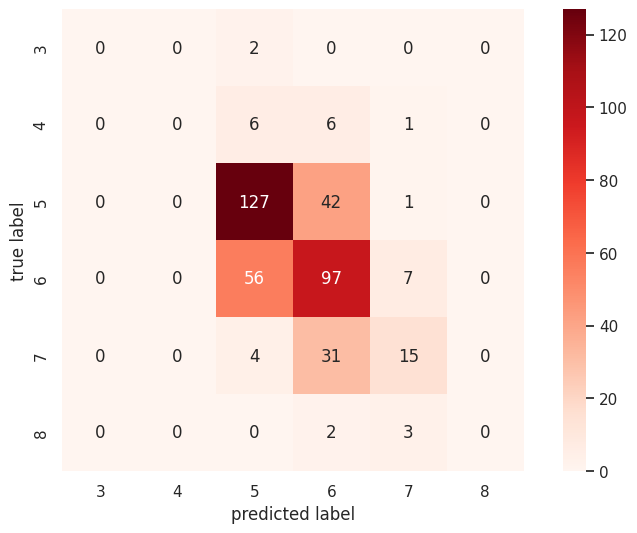

In [117]:
# Давайте для наглядності побудуємо confusion matrix:

labels = LogReg.classes_
y_pred = LogReg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label')

Вірно угадані значення знаходяться на діагоналі матриці. Наша модель відносно непогано справилась з класами 5 та 6, у всіх інших були проблеми з виявленням через об'єктивну причину - дуже невелику кількість прикладів з цими класами (модель не змогла навчитись).

#Висновки:


*   вина білі і червоні мають свої особливості, тому розглядати їх як одне не є оптимальним
*   моделі успішно навчаються і не перенавчаються, але для кращих результатів бракує даних, особливо, на краях (а також вибірки не є збалансовані, що утруднює аналіз). Тому моделі скоріше недонавчені, і збільшення даних покращить результати аналізу.
*   найкращі оцінки вин, як виявилось, - з найбільшим рівнем алкоголю - цікавий факт




